# Explore here

In [5]:
# Your code here

import pandas as pd 

df = pd.read_csv('../data/raw/River_Arno.csv')

df

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [8]:
ts = pd.DataFrame()
ts['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")
ts['Hyd'] = df['Hydrometry_Nave_di_Rosano']
ts.index = ts['Date']
ts.drop(columns = 'Date', axis = 1, inplace = True)

ts

,Hyd
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [3]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
ts.isnull().sum()

Hyd    48
dtype: int64

In [6]:
ts = ts.interpolate(method = 'linear')
ts.isnull().sum()

Hyd    0
dtype: int64

In [9]:
!pip install stattools

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [10]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts, period = 365)

trend = decomp.trend
seasonal = decomp.seasonal

import matplotlib.pyplot as plt
import seaborn as sns 

sns.lineplot(data = ts, x = ts.index, y = ts.Hyd, label = "Hidrometría")
sns.lineplot(data = trend, label = "Tendencia")
sns.lineplot(data = seasonal, label = "Estacionalidad")

plt.tight_layout()
plt.show()



ValueError: This function does not handle missing values

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller")
    dftest =  adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = {"Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"})
    for key, value in dftest[4].items():
        dfoutput["Critical value (%s)"%key] = value
    return dfoutput

test_stationarity(ts) 


Resultados de la prueba de Dickey-Fuller


p-value                       -7.825536e+00
#Lags Used                     6.496928e-12
Number of Observations Used    3.700000e+01
Test Statistic                 8.179000e+03
Critical value (1%)           -3.431150e+00
Critical value (5%)           -2.861893e+00
Critical value (10%)          -2.566958e+00
dtype: float64

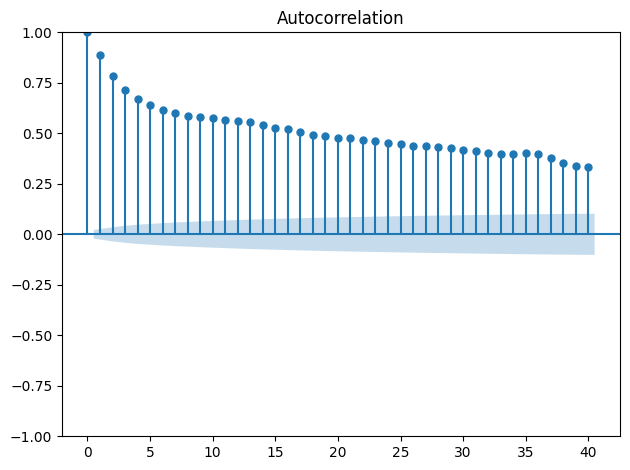

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()
plt.show()

In [12]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal=True, trace=True,m=3)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=2137.231, Time=11.52 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=2914.101, Time=0.47 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=2816.290, Time=1.52 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=2796.251, Time=2.03 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3]             : AIC=2912.102, Time=0.36 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=2110.519, Time=11.50 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=2108.485, Time=7.11 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=2110.520, Time=8.50 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=2106.713, Time=3.83 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3] intercept   : AIC=2108.278, Time=6.58 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3] intercept   : AIC=2108.278, Time=6.88 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3] intercept   : AIC=2110.378, Time=7.72 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[3] intercept   : AIC=2534.854, Time=2.82 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=2247.525, Time=3.99 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3] intercept   : AIC=2912.583, Time=0.91 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=2112.645, Time=3.43 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3]             : AIC=2104.717, Time=1.42 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3]             : AIC=2106.282, Time=2.16 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3]             : AIC=2106.282, Time=2.34 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3]             : AIC=2108.389, Time=2.64 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[3]             : AIC=2532.856, Time=0.58 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3]             : AIC=2245.530, Time=0.85 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3]             : AIC=2106.488, Time=1.32 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3]             : AIC=2910.583, Time=0.87 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3]             : AIC=2110.649, Time=1.35 sec

Best model:  ARIMA(1,1,2)(0,0,0)[3]          
Total fit time: 92.759 seconds


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8217
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1048.359
Date:                Mon, 15 Sep 2025   AIC                           2104.717
Time:                        23:10:57   BIC                           2132.773
Sample:                    01-01-1998   HQIC                          2114.308
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6222      0.010     64.259      0.000       0.603       0.641
ma.L1         -0.7225      0.009    -78.190      0.000      -0.741      -0.704
ma.L2         -0.1780      0.006    -32.090      0.000      -0.189      -0.167
sigma2         0.0756      0.000    297.728      0.000       0.075       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            673373.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             4.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
forecast = model.predict(n_periods = 365)
forecast

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2020-07-01    1.348385
2020-07-02    1.366374
2020-07-03    1.377566
2020-07-04    1.384529
2020-07-05    1.388861
                ...   
2021-06-26    1.395996
2021-06-27    1.395996
2021-06-28    1.395996
2021-06-29    1.395996
2021-06-30    1.395996
Freq: D, Length: 365, dtype: float64

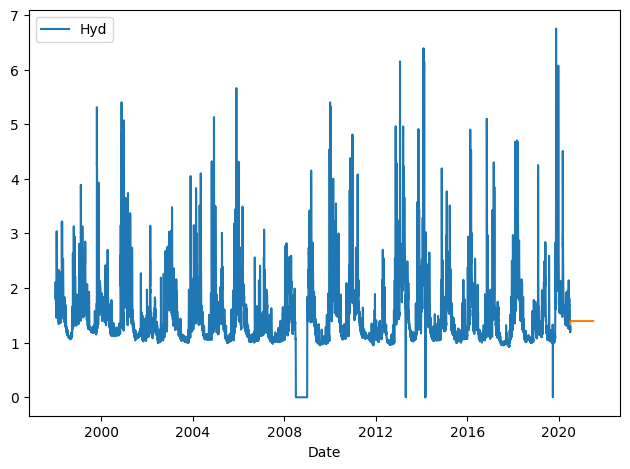

In [15]:
sns.lineplot(data = ts)
sns.lineplot(data = forecast)

plt.tight_layout()
plt.show()

In [2]:
!pip install neuralprophet


Defaulting to user installation because normal site-packages is not writeable
  Using cached neuralprophet-0.9.0-py3-none-any.whl (145 kB)
  Using cached captum-0.8.0-py3-none-any.whl (1.4 MB)
  Using cached holidays-0.81-py3-none-any.whl (1.3 MB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)
  Using cached pytorch_lightning-2.5.5-py3-none-any.whl (832 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)


In [23]:
ts_np = ts.reset_index()

ts_np

,Date,Hyd
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [4]:
ts_np.rename(columns={'Date':'ds','Hyd':'y'},inplace=True)

NameError: name 'ts_np' is not defined

In [3]:
from neuralprophet import NeuralProphet

m = NeuralProphet()

metrics = m.fit(ts_np,freq="D")

future = m.make_future_dataframe(ts_np,periods=365)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)

plt.show()

ModuleNotFoundError: No module named 'neuralprophet'